## Making 3D plots for hidden sample experiment

In [1]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from pathlib import Path
%cd ..

/Users/andrey/MIPT_projects/M1P_6_sem/2023-Project-119


In [95]:
# make pd.DataFrame from our results
sigma_orig = 0.1
hidden_loops = Path(f"results/hidden_samples_4_{sigma_orig}")
results = []

chosen_step = 4000
for folder in sorted(hidden_loops.iterdir()):
    if folder.name != '.DS_Store':
        adherence, usage, step = folder.name.split('-')
        adherence = float(adherence)
        usage = float(usage)
        step = float(step)

        data = pd.read_csv(f"{hidden_loops}/{folder.name}/deviations/ridge-dev_step_{chosen_step}.csv")
        deviation = np.std(data['y'] - data['y_pred'])
        row = {"adherence" : adherence,
               "usage" : usage,
               "step" : step,
               "deviation" : deviation}
        results.append(row)

results = pd.DataFrame(results)
print(f'Len = {len(results)}')

Len = 165


In [96]:
# function to find exact element in pd Dataframe
def results_find(adherence, usage, chosen_step=10):
    for _, row in results.iterrows():
        if (row["adherence"] == adherence)\
            and (row["usage"] == usage)\
            and (row["step"] == chosen_step):
            return row["deviation"]

In [97]:
# preparing data
chosen_step = 10
adherence = results[results['step'] == chosen_step]['adherence'].unique()
adherence = sorted(adherence)
usage = results[results['step'] == chosen_step]['usage'].unique()
usage = sorted(usage)
X, Y = np.meshgrid(usage, adherence)

Z = np.zeros(shape=(len(adherence), len(usage)))
for i, us in enumerate(usage):
    for j, ad in enumerate(adherence):
        Z[j, i] = results.where((results["adherence"] == ad) & (results["usage"] == us) & (results["step"] == chosen_step))["deviation"].max()

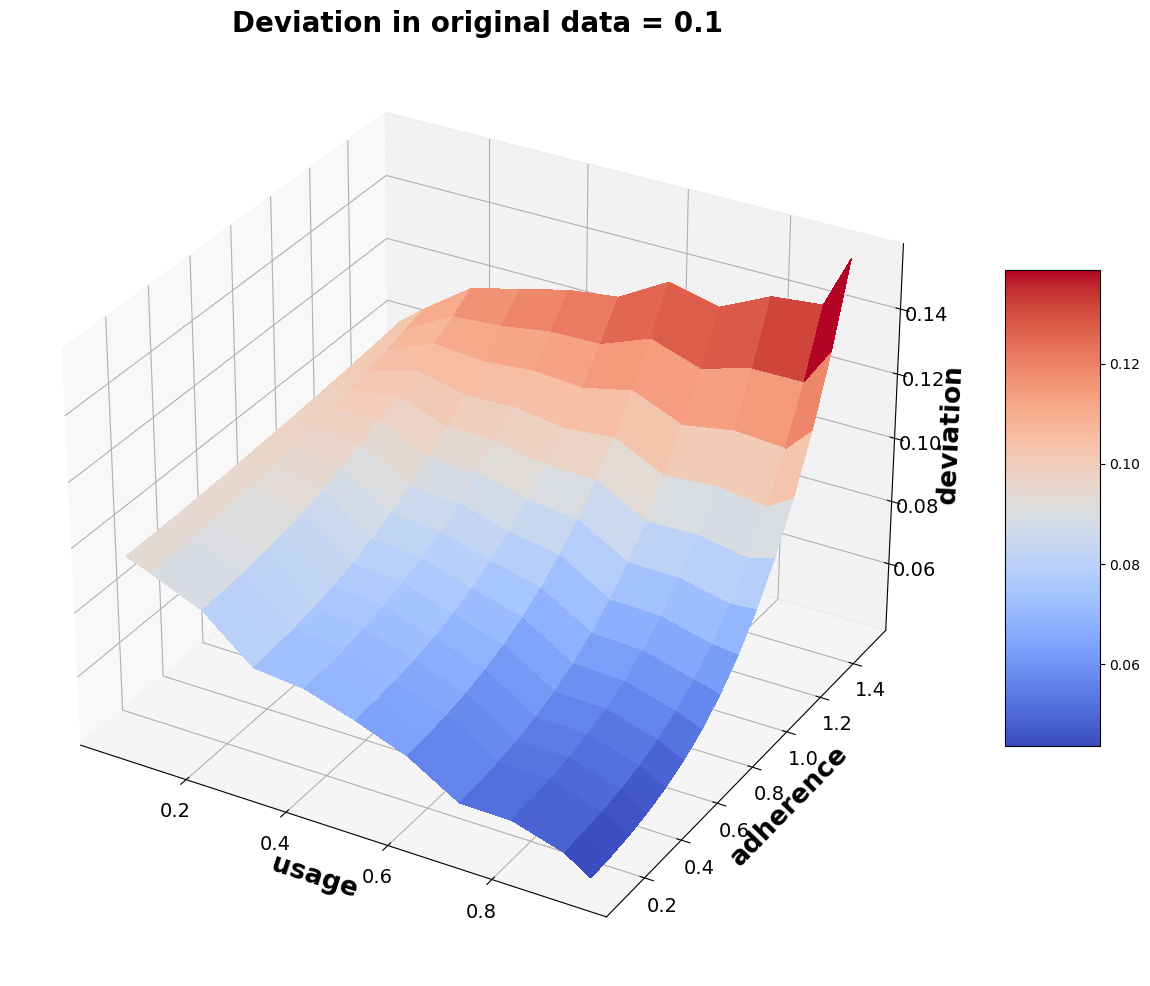

In [98]:
# making 3D plot of adherence, usage and deviation
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (12, 10))

#plot
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_title(f"Deviation in original data = {sigma_orig}", 
             fontsize = 20, fontweight='bold')
ax.set_xlabel("usage", fontsize = 19, fontweight='bold')
ax.set_ylabel("adherence", fontsize = 19, fontweight='bold')
ax.set_zlabel("deviation", fontsize = 19, fontweight='bold')
ax.tick_params(labelsize=14)
plt.tight_layout()
plt.savefig(f"figures/3D_plot_sample_{sigma_orig}.png")
plt.show()